# Project Report

### Goal

The task of the project is to train an agent, using Deep Reinforcement Learning, the agent must move a double jointed arm in specific target locations

A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.

The agent must achieve a score of at least 30 points over at least 100 episodes.

### Implementation details

The off-policy approach used to solve this problem is Deep Deterministic Policy Gradient; which internally makes use of two separate Deep Neural Networks, the Actor and the Critic networks.

As the environment contains continous actions spaces, unlike the last project, we cannot use deep Q-learning, the reason behind this is that computing the maximum over actions in the target is a challenge in continuous action spaces.
DDPG deals with this by using a target policy network to compute an action which approximately maximizes Q.

Because the action space is continuous, and we assume the Q-function is differentiable with respect to action, we can perform gradient ascent to update the policy network.

Our algorithm core is composed of:

- The first step is to randomly sample a batch of state transitions from our replay buffer.

- Then we update the Q function (Critic network) by one step using gradient descent.

- Then we update the policy function (Actor network) by one step using gradient ascent.



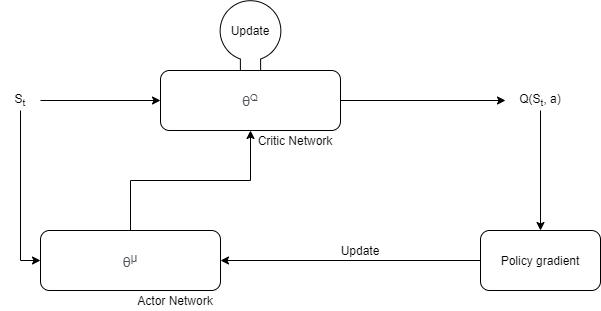

The implementation also makes use of target networks in order to stabilize learning. The target network is a copy of the original network and use this separate network to make 'soft updates' to the main network weights, thus, achieving a stabilizing effect.

### Neural network architecture


The original base network implementation was built with a hidden layer and an output layer, composed of 400 and 300 neurons respectively.
During the experimentation phase, I've tested by adding and removing neurons. 
Adding neurons did not improve learning speed, more on this in the improvements section.
Removing neurons did help by accelerating learning speed towards the goal score of 30.


The final network's architecture, used for both the Actor and Critic, is composed of the following neurons:

- Hidden layer: 128
- Output layer: 128

This is the structure of the forward pass:

Actor network

        Input Layer = ReLU(Input States) ---- Input States is a 33 is the length of the State Vector
        Batch Normalization Layer = BatchNorm(Input Layer Output(128))
        Rectified Linear Layer = ReLU(Batch Normalization Layer Output(128))
        Output Layer = TanH(Rectified Linear Layer Output (4)) ---- 4 is the length of the Action Vector

Critic network

        Input Layer = ReLU(Input States) ---- Input States is a 33 is the length of the State Vector
        Batch Normalization Layer = BatchNorm(Input Layer Output(128))
        Rectified Linear Layer = ReLU(Batch Normalization Layer Output(128))
        Output Layer = Output Layer Neurons(Rectified Linear Layer Output(1)) ---- 4 is the length of the Action Vector


### Training parameters

Number of episodes: 500

Replay buffer size: 100,000 

Batch size: 128

Gamma: 0.99

Tau:  0.0003 (Softening factor, used to update the target network weights)

Actor learning rate: 0,0002 

Critic learning rate: 0,0002 

Weight decay: 0





### Training result
The agent was able to reach the target score of 30 at 204 episodes.

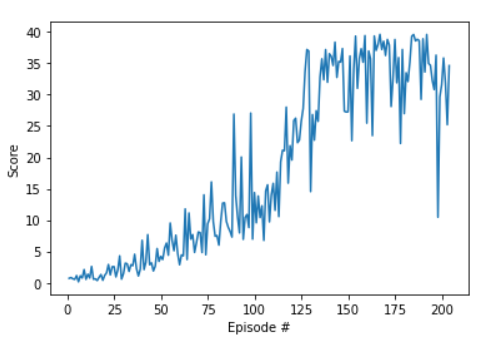

### Thoughts for improvement:

Tune the hyperparameters to find the maximum score achievable with the current implementation.

Implement the following algorithms and compare the results

- A3C Asynchronous Advantage Actor-Critic
- ACER Actor Critic with Experience Replay
- GAE Generalized Advantage Estimation
- A2C Advantage Actor-Critic
- PPO - Proximal Policy Optimization